# Final Project

## Basic Info:

- **Project Title:** Analyzing Factors Influencing Mobile Pricing
- **Name:** Niraj Jaishwal
- **Email Address:** nkj5@uakron.edu


## Background and Motivation

In today's highly competitive mobile phone market, understanding the factors influencing pricing and sales is crucial for manufacturers, retailers, and consumers alike. As a technology enthusuast with a keen interest in market trends and consumers behavior, I am motivated to explore this topic to grain insights into how various attributes such as brands, memory, storage, and customer rating and pricing strategies impact mobile phone selling. This project presents an exciting opportunity to apply data analysis techniques to real world data and derive actionable insights, uncover trends, patterns and correlations that can inform strategic decision-making in the mobile industry.

## Project Objective

**Primary Questions:**
- What are the key factors influencing mobile phone sales pricing?
- Is there a correlation between the storage capacity of a mobile phone and its selling prices?
- How much does the brand reputation contribute to the selling price?


**Goals and Benefits:**
- Gain insights into the dynamics of mobile phone sales pricing.
- Identify factors that drive consumer preferences and purchasing decisions.
- Provide actionable recommendation for manufactures and retailers to optimize pricing strategies and product offerings.
- Provide recommendation to consumers about the factors that are considered while buying phone.

## Dataset Acquisition

I acquired the dataset from Kaggle, a platform for data science and machine learning enthusiasts. The dataset is available at the following link: [Smartphone Sale Dataset](https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset?resource=download).

The dataset contains information on smartphone sales, including various attributes such as brands, models, colors, memory, storage, camera, rating, selling price, original price, and discounts. It provides a valuable resource for analyzing factors influencing mobile pricing in the smartphone market.

In [1]:
# imports and setup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Loading the Dataset


In [2]:
# import data of sales
sales = pd.read_csv('Sales.csv')

## Ethical Considerations
**StakeHolder Analysis:**
- Manufactures: Intrested in maximising sales and profitability
- Retailers: Seek insights into consumer preferences to optimize product assortment and pricing strategies
- Consumers: Expect fair pricing and transparency in product offerings
- Society: Concerns about ethical marketing practices and fair competition in the mobile industry

## Data Cleaning

### Initial Inspection
Our first step in cleaning the sales dataset invloves a thorough inspection to identify any irregularities such as empty data entries, negative values and unsual entries. This inspection will serve as a roadmap for our cleaning process and enable us to compare the dataset before and after cleaning.

In [3]:
# first five data from the dataset
print("First five data from the dataset:\n", sales.head(), "\n")

# struture of dataset, including data type and missing values
print("Structure of Dataset:\n", sales.info(), "\n")

# summary statisticts for numerical columns
print("The summary statistics for numerical columns:\n", sales.describe(), "\n")

# calculate if every phone have camera
print("The total count of the Camera:", sales['Camera'].value_counts(), "\n")


First five data from the dataset:
     Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.0

### Remove Negative value
Drop the data with the negative discount amount from the data set `sales` using `drop()`

In [4]:
# Filter rows with negative values in the "Discount" column
negative_discounts = sales[sales['Discount'] < 0]

# Display the rows with negative discounts
print(negative_discounts)

# Filter rows with negative values in the "Discount" column
negative_discount_indices = sales[sales['Discount'] < 0].index

# Remove rows with negative discounts
sales = sales.drop(negative_discount_indices)

     Brands Models Colors Memory Storage Camera  Rating  Selling Price  \
2137   OPPO    A5s    Red   2 GB   32 GB    Yes     4.3          12990   

      Original Price    Mobile  Discount  discount percentage  
2137            4990  OPPO A5s     -8000          -160.320641  


**Dropping the `Camera`, `Models`, `Discount`, `discount percentages` and `Original Price` Column**

**Drop `Camera` Column**  
Upon dataset inspection, it's apparent that each phone entry includes camera information. As the presence of a camera is consistent across all entries and doesn't offer meaningful variation for analysis, we've opted to drop the 'Camera' column. This decision streamlines our dataset, focusing our analysis on key attributes affecting mobile pricing and sales.

**Drop `Models` Column**  
Every Brands have large number of models of phones which is not fesible to include and study for different brands of the phones.

**Drop `Discount` and `discount percentages` Columns**  
Our study doesn't invlove the discount and discount percentage, so we can drop them. 

**Drop `Original Price`**
our study doesn't invlove the Original Price, we can drop `Original Price` column

In [5]:
# Drop Models, Camera, Discount, and discount percentages from the data set
sales = sales.drop(columns=['Models', 'Camera','Discount','discount percentage', 'Mobile', 'Original Price'])

# Display the first few rows of the DataFrame to verify the column has been dropped
print(sales.head())

# Display the empty data
sales.isnull().sum()

    Brands         Colors Memory Storage  Rating  Selling Price
0  SAMSUNG   Mirage Black   8 GB  128 GB     4.3          19330
1    Nokia          Steel   2 GB   16 GB     3.8          10199
2   realme  Diamond Black   2 GB     NaN     4.4           6999
3  Infinix       Ice Blue   4 GB   64 GB     4.2          12999
4    Apple          Black    4GB   64 GB     4.6          49900


Brands             0
Colors             0
Memory            43
Storage           39
Rating           144
Selling Price      0
dtype: int64

### Change the Currency from INR to USD
The `Selling price` and `Original price` are in indian rupee(INR). The amount is converted to USD.

In [6]:
# Multiply the 'Selling Price' and 'Original Price' columns by the conversion rate
sales['Selling Price'] = round(sales['Selling Price'] * 0.012, 2)

print(sales.head())

    Brands         Colors Memory Storage  Rating  Selling Price
0  SAMSUNG   Mirage Black   8 GB  128 GB     4.3         231.96
1    Nokia          Steel   2 GB   16 GB     3.8         122.39
2   realme  Diamond Black   2 GB     NaN     4.4          83.99
3  Infinix       Ice Blue   4 GB   64 GB     4.2         155.99
4    Apple          Black    4GB   64 GB     4.6         598.80


### Handling Missing  Values, Duplicate Entries and Convert Storage and Memory Variables

The following steps are performed to preprocess the dataset 'sales':

1. **Removing Missing Values and Duplicates:**
   - Rating with missing values are filled using the `fillna()` function.
   - Rows with missing values are dropped using the `dropna()` function.
   - Duplicated entries are removed using the `drop_duplicates()` function.

2. **Converting Storage and Memory Capacities to MB:**
   - A custom function `mbconverter` is defined to convert storage and memory capacities to megabytes (MB).
   - This function checks for units (GB, MB, TB) in the input string and performs the appropriate conversion.
   - The `apply` function is used to apply the `mbconverter` function to the 'Memory' and 'Storage' columns of the dataset.


In [7]:
# fill the rating with the mean of rating
sales['Rating'].fillna(sales['Rating'].mean(), inplace=True)

# Remove the rows with the missing values
sales = sales.dropna()

# Remove the rows with the duplicated entries
sales = sales.drop_duplicates()

# Convert storage/memory capacities to MB
def mbconverter(x):    
    if "GB" in x:
        x=x.replace("GB","")
        x=x.replace("ExpandableUpto","")
        x=x.replace("Expandable Upto","")
        x=x.replace(" ","")
        size=float(x)*1024
    elif "MB" in x:
        x=x.replace("MB","")
        x=x.replace("ExpandableUpto","")
        x=x.replace("Expandable Upto","")
        x=x.replace(" ","")
        size=float(x)
    elif "TB" in x:
        x=x.replace("TB","")
        x=x.replace("ExpandableUpto","")
        x=x.replace("Expandable Upto","")
        x=x.replace(" ","")
        size=float(x)*1024*1024 
    return size

sales['Storage']=sales['Storage'].str.replace("ExpandableUpto","")

# Apply mbconverter function to the 'Memory' column
sales['Memory']=sales['Memory'].apply(mbconverter)

# Apply mbconverter function to the 'Storage' column
sales['Storage']=sales['Storage'].apply(mbconverter)

### Extract Apple and Samsung Data
Extracting the samsung data to samsung_sales dataset and Apple data to apple_sales dataset from the sales dataset to continue for furthur analysis on these two Brands.

In [8]:
# Extract Apple sales data from the sales data
apple_sales = sales[sales['Brands'] == 'Apple']

# samsung sales data from the sales data
samsung_sales = sales[sales['Brands'] == 'SAMSUNG']

### Outlier Detection and Removal

The following code detects and removes outliers from the 'Original Price' column of the dataset 'sales'. Outliers are identified using the Interquartile Range (IQR) method, where values outside the range of 1.5 times the IQR above the third quartile (Q3) or below the first quartile (Q1) are considered outliers.

1. **Detecting Outliers:**
   - The `detect_outliers` function calculates the first quartile (Q1), third quartile (Q3), and IQR of the 'Original Price' column.
   - Outliers are identified based on whether they fall outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

2. **Removing Outliers:**
   - The `sales_outliers` variable stores a boolean mask indicating the presence of outliers in the 'Original Price' column.
   - The `any(axis=1)` method is used to check if any outlier is present in each row, and rows containing outliers are filtered out from the dataset using boolean indexing.
   - The resulting dataset after outlier removal is displayed using the `info()` method to inspect the changes.


In [9]:
# function to detect the outlier
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Find the outlier data for sales dataset
sales_outliers = detect_outliers(sales[['Selling Price']])
print("The outlier in sales Dataset", sales_outliers.value_counts())

# Filter out outliers from the sales dataset
sales = sales[~sales_outliers.any(axis=1)]

# Find the outlier data for apple_sales dataset
apple_sales_outliers = detect_outliers(apple_sales[['Selling Price']])
print("The outlier in apple sales Dataset", apple_sales_outliers.value_counts())

# Filter out outliers from the sales dataset
apple_sales = apple_sales[~apple_sales_outliers.any(axis=1)]

# Find the outlier data for samsung_sales dataset
samsung_sales_outliers = detect_outliers(samsung_sales[['Selling Price']])
print("The outlier in samsung sales Dataset", samsung_sales_outliers.value_counts())

# Filter out outliers from the sales dataset
samsung_sales = samsung_sales[~samsung_sales_outliers.any(axis=1)]


The outlier in sales Dataset Selling Price
False            2542
True              360
Name: count, dtype: int64
The outlier in apple sales Dataset Selling Price
False            306
Name: count, dtype: int64
The outlier in samsung sales Dataset Selling Price
False            610
True              73
Name: count, dtype: int64


### Reindexing the DataFrame

Reindex the DataFrame `apple_sales`and `samsung_sales` after outliers that the index starts from 0. The `reset_index()` method is used with the parameters `drop=True` to drop the existing index and `inplace=True` to modify the DataFrame in place without returning a new DataFrame.

In [10]:
# Reindex the cleaned sales DataFrame
sales.reset_index(drop=True, inplace=True)

# Reindex the cleaned apple_sales DataFrame
apple_sales.reset_index(drop=True, inplace=True)

# Reindex the cleaned samsung_sales DataFrame
samsung_sales.reset_index(drop=True, inplace=True)


### Final Dataset
After data processing, the final dataset of `apple_sales` and `samsung_sales` is obtained.

In [11]:
# First five data from the apple_sales dataset
print("First five data from the sales dataset:\n", sales.head(), "\n")

# struture of apple_dataset after data cleaning
print(sales.info())

# First five data from the apple_sales dataset
print("First five data from the apple_sales dataset:\n", apple_sales.head(), "\n")

# struture of apple_dataset after data cleaning
print(apple_sales.info())

# First five data from the samsung_sales dataset
print("First five data from the samsung_sales dataset:\n", samsung_sales.head(), "\n")

# struture of samsung_dataset after data cleaning
print(samsung_sales.info())

First five data from the sales dataset:
     Brands        Colors  Memory   Storage  Rating  Selling Price
0  SAMSUNG  Mirage Black  8192.0  131072.0     4.3         231.96
1    Nokia         Steel  2048.0   16384.0     3.8         122.39
2  Infinix      Ice Blue  4096.0   65536.0     4.2         155.99
3    Apple         Black  4096.0   65536.0     4.6         598.80
4   GIONEE         Black     8.0      16.0     4.0          26.39 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2542 non-null   object 
 1   Colors         2542 non-null   object 
 2   Memory         2542 non-null   float64
 3   Storage        2542 non-null   float64
 4   Rating         2542 non-null   float64
 5   Selling Price  2542 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.3+ KB
None
First five data from the apple_sales dataset

## Exploratory Analysis

### Summary Statistics

In [12]:
# Display summary statistics for numerical variables
sales_summary_stats = sales.describe()
print("The summary statistics for sales dataset", sales_summary_stats)

# Display summary statistics for numerical variables
apple_summary_stats = apple_sales.describe()
print("The summary statistics for apple_sales dataset", apple_summary_stats)

# Display summary statistics for numerical variables
samsung_summary_stats = samsung_sales.describe()
print("The summary statistics for samsung_sales dataset", samsung_summary_stats)

The summary statistics for sales dataset              Memory        Storage       Rating  Selling Price
count   2542.000000    2542.000000  2542.000000    2542.000000
mean    4066.861133   69623.656570     4.200489     198.196428
std     2416.688278   59794.932449     0.257162     127.860730
min        2.000000       2.000000     2.300000      12.000000
25%     2048.000000   32768.000000     4.100000     107.990000
50%     4096.000000   65536.000000     4.300000     167.305000
75%     6144.000000  131072.000000     4.400000     240.000000
max    12288.000000  524288.000000     5.000000     635.880000
The summary statistics for apple_sales dataset             Memory       Storage      Rating  Selling Price
count   306.000000  3.060000e+02  306.000000     306.000000
mean   3647.581699  2.348909e+05    4.514741    1005.657124
std    1389.170002  2.308415e+05    0.145286     492.045096
min    1024.000000  1.638400e+04    4.243078     299.990000
25%    2048.000000  6.553600e+04    4.500000 

**Sales DataSet**   
The sales dataset is used to create a visual representation (box plots) to compare the distribution of selling prices across different brands.   

The box plot represent the distribution of sales dataset based on five summary statistics: minimum, first quartile(Q1), median, third quartile(Q3), and maximum. The data before minimum and after maximum are considered outliers.

Then the average selling price for each brand is calculated by grouping Brands and Selling price using `groupby()` and taking the mean using `mean()`.

The calculated average selling price is used to create a histogram to better understand and compare selling price between the various Brands phones.

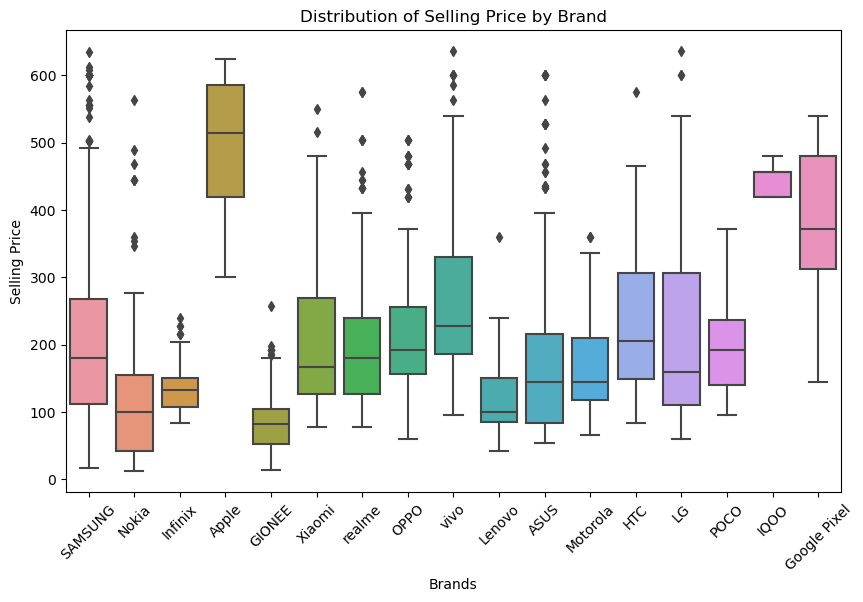

          Brands  Selling Price
0           ASUS     200.000185
1          Apple     487.215976
2         GIONEE      86.084844
3   Google Pixel     385.639000
4            HTC     230.995238
5           IQOO     446.280000
6        Infinix     133.870694
7             LG     213.221158
8         Lenovo     121.386842
9       Motorola     167.706500
10         Nokia     115.991875
11          OPPO     217.620364
12          POCO     202.449459
13       SAMSUNG     211.035191
14        Xiaomi     199.786462
15        realme     198.395719
16          vivo     267.404322


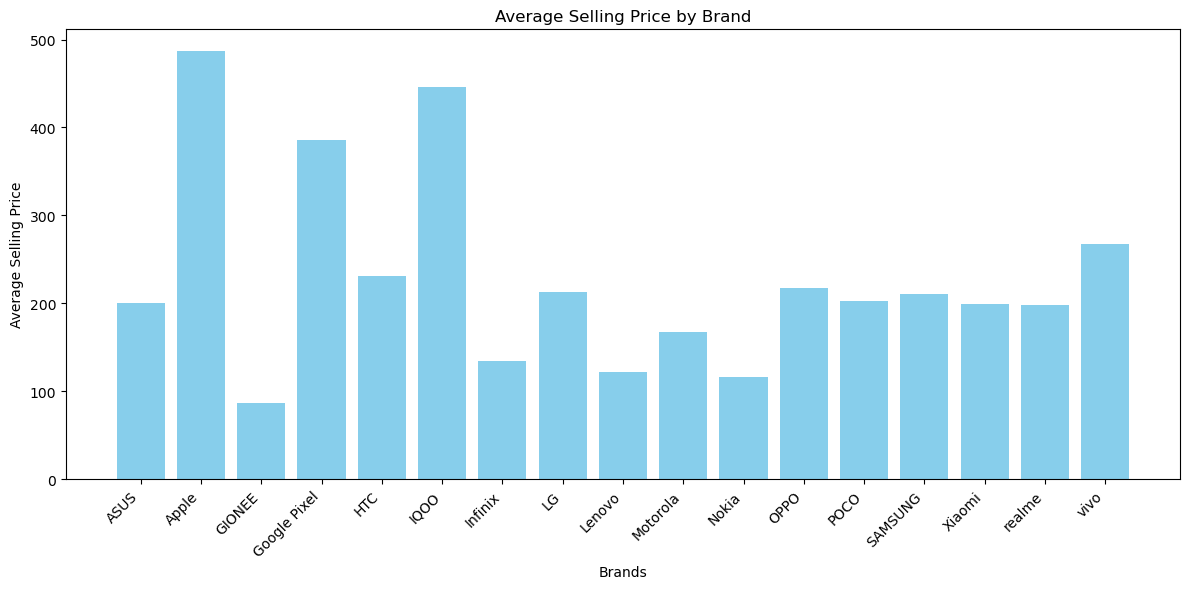

In [13]:
# Create box plots to compare the distribution of selling prices across different brands
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brands', y='Selling Price', data=sales)
plt.title('Distribution of Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()

# Calculate average selling price for each brand
average_selling_price = sales.groupby('Brands')['Selling Price'].mean().reset_index()
print(average_selling_price)

# Create histogram
plt.figure(figsize=(12, 6))
plt.bar(average_selling_price['Brands'], average_selling_price['Selling Price'], color='skyblue')
plt.title('Average Selling Price by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the Box Plot, we can find that Apple has the maximum central tendency. Vivo and GooglePixel has huge variability. We can also see Samsung and ASUS has maximum presence of outlier. These data has impact in skewing statistical measures.  

From the result, The Higest Value for seling price is 487.21 .The lowest Value for selling price is 86.08. we can conclude that Apple has the higest and Gionee has the lowest selling price among other Brands.  

The visual provides a clear summary of distribution of selling price among different Brands phone.

**Count Histogram**  
The sales dataset is used to creat a histogram to visualize the distribution of numer of sales of a particular brands.

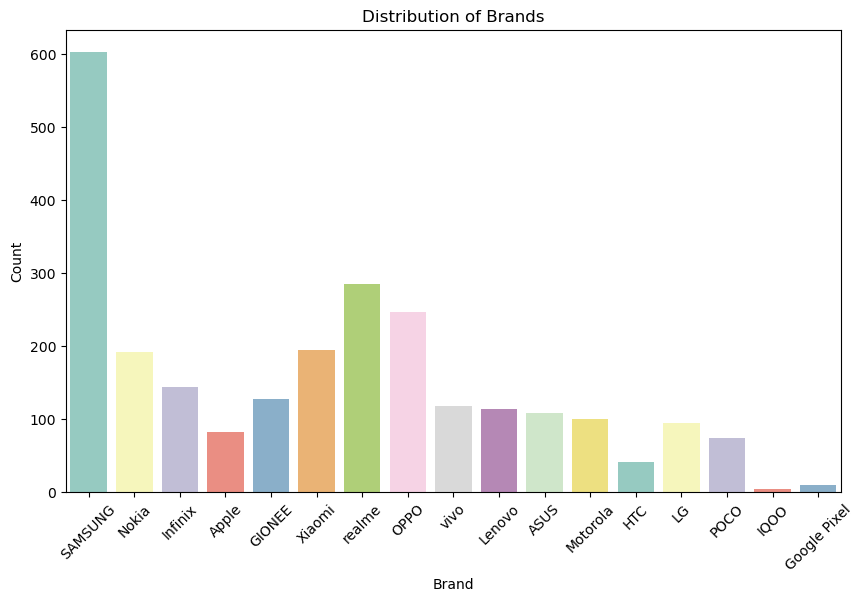

In [14]:
# Histograms to visualize the distribution of number of sales and different brands
plt.figure(figsize=(10, 6))
sns.countplot(x='Brands', data=sales, palette='Set3')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the histogram provided, it's evident that the dataset contains the highest number of phones from the Samsung brand, with nearly 600 units. Conversely, the number of Apple phones appears to be less than 100 based on the visual representation.

However, upon examining the summary statistics of the apple_sales data, we discover that there are actually 306 Apple phones remaining after the removal of outliers. This indicates that a significant portion of outliers removed from the sales dataset belonged to the Apple brand. The primary reason for considering these entries as outliers was likely the high price associated with Apple products.  

Since the dataset contains the highest number of phones from the Samsung brand, studying the Samsung dataset will provide valuable insights into the market for Samsung phones.

This suggests performing separate data analyses on the datasets of Apple and Samsung brands, excluding phones from other brands. 

**Correlation**  
In the sales dataset, correlation analysis is conducted to explore the relationships between variables. This analysis aims to gain insights into the connections between the attributes of the phone and its selling price. By examining correlations, we can better understand how different features may influence the selling price of the phones.  
The correlation_matrix is calculates using `corr()`

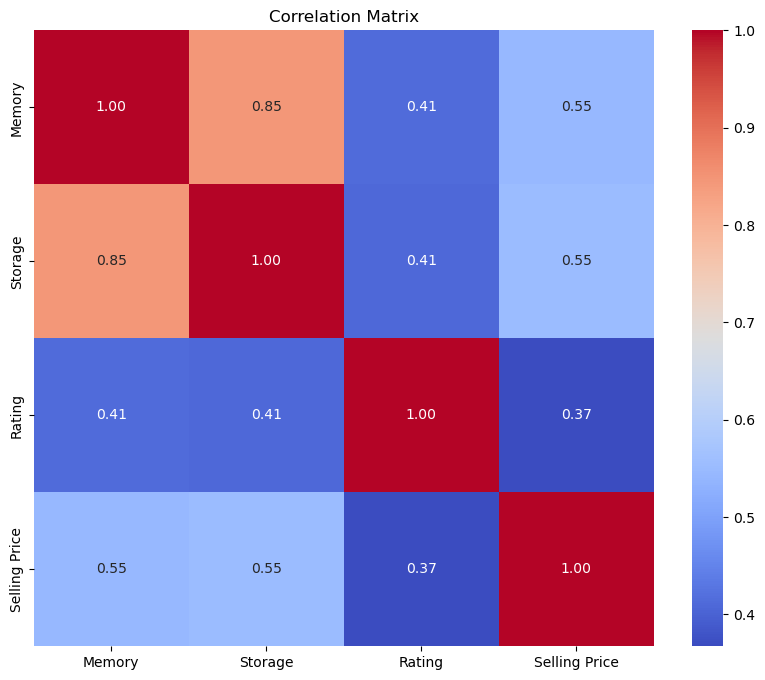

In [15]:
# numeric columns for correlation analysis
numeric_columns = sales.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation coefficients between storage capacity and selling price for sales dataset are as follows:

- Memory: 0.55
- Storage: 0.55

Both memory and storage capacity show a moderate positive correlation with selling price, indicating that as the memory and storage capacity of a mobile phone increase, its selling price tends to increase as well.

These findings support that there is indeed a correlation between the storage capacity of a mobile phone and its selling price.

### apple_sales Dataset Analysis

Given the disparity between the number of Apple brand phones in the sales dataset and the actual count of Apple phones recorded separately, a dedicated analysis of the Apple brand phones is conducted. This approach allows for a more thorough examination to better understand the relationship.

**Correlation for `apple_sales` Dataset**  

In the `apple_sales` dataset, correlation analysis is conducted to explore the relationships between variables. This analysis aims to gain insights into the connections between the attributes of the Apple Brand phones and its selling price. By examining correlations, we can better understand how different features may influence the selling price of the Apple phones.

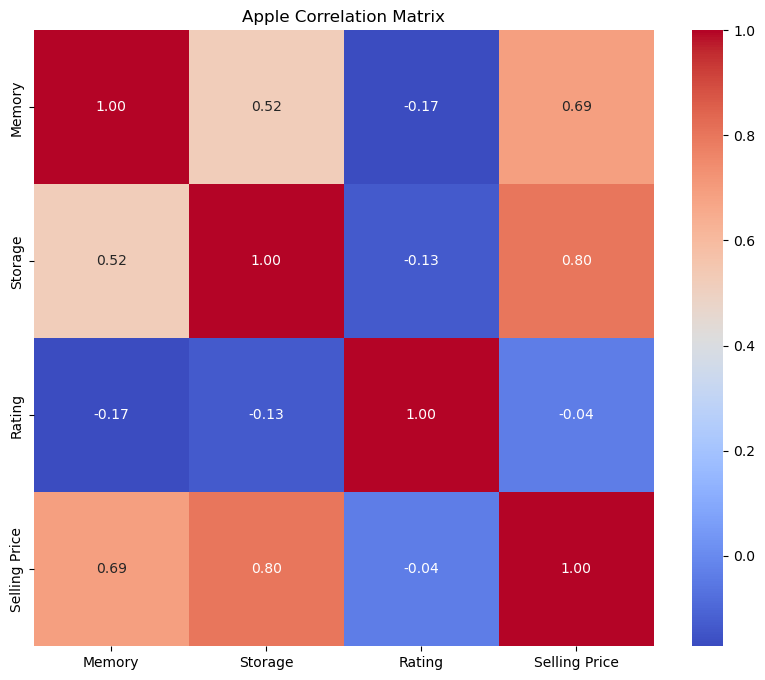

In [16]:
# Select only numeric columns of apple_sales for correlation analysis
apple_numeric_columns = apple_sales.select_dtypes(include=['int64', 'float64'])

# Calculate apple correlation matrix
apple_correlation_matrix = apple_numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(apple_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Apple Correlation Matrix')
plt.show()


The correlation coefficients between storage capacity and selling price for the `apple_sales` dataset are notably higher compared to the correlation coefficients obtained from the entire sales dataset:

- Memory: 0.69 (compared to 0.55 in the sales dataset)
- Storage: 0.80 (compared to 0.55 in the sales dataset)

These higher correlation coefficients indicate a stronger positive correlation between memory, storage capacity, and selling price specifically for Apple Phones. The large positive correlations suggest that as the memory and storage capacity of an Apple mobile phone increase, its selling price tends to increase significantly


### samsung_sale Dataset Analysis
The sales dataset contains the highest number of phones from the Samsung brand, studying the Samsung dataset will provide valuable insights into the market for Samsung phones. This approach allows for a more thorough examination to better understand the relationship just for samsung phones

**Correlation for `samsung_sales` Dataset**  
In the `samsung_sales` dataset, correlation analysis is conducted to explore the relationships between variables. This analysis aims to gain insights into the connections between the attributes of the Sasung Brand phones and its selling price. By examining correlations, we can better understand how different features may influence the selling price of the Samsung phones.

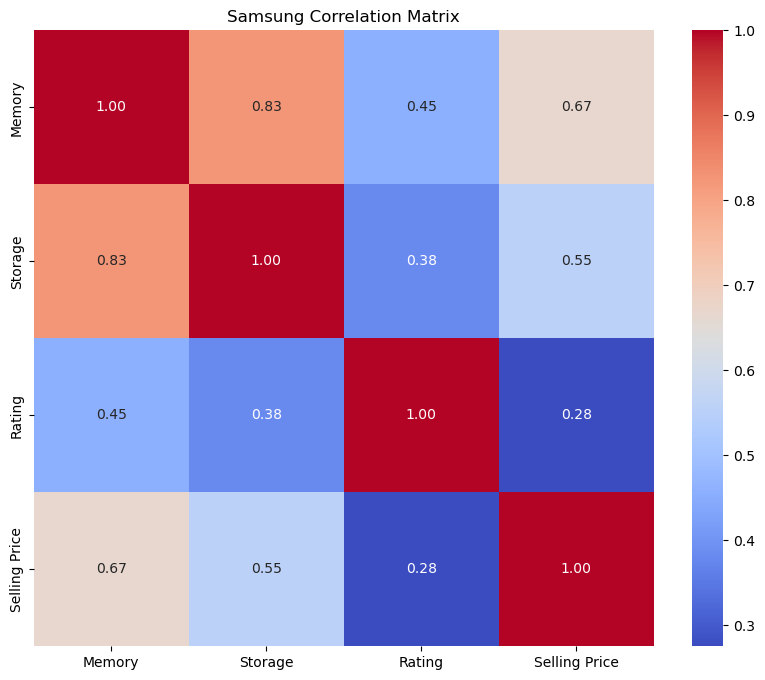

In [17]:
# Select only numeric columns of samsung_sales for correlation analysis
samsung_numeric_columns = samsung_sales.select_dtypes(include=['int64', 'float64'])

# Calculate samsung correlation matrix
samsung_correlation_matrix = samsung_numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(samsung_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Samsung Correlation Matrix')
plt.show()


The correlation coefficients between memory capacity and selling price for the `samsung_sales` dataset are notably higher compared to the correlation coefficients but the correlation coefficients between storage capacity and selling price for the `samsung_sales` dataset are same compared to the correlation coefficient obtained from the entire sales dataset

- Memory: 0.67 (compared to 0.55 in the sales dataset)
- Storage: 0.55 (compared to 0.55 in the sales dataset)

These higher correlation coefficients indicate a stronger positive correlation between memory and selling price specifically for Samsung Phone. The large positive correlations suggest that as the memory of an Samsung mobile phone increase, its selling price tends to increase significantly.

## Detailed Analysis

### Regression for apple_sales Dataset

In [18]:
# Regression analysis
X = apple_sales[['Storage', 'Rating', 'Memory']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept term
y = apple_sales['Selling Price']  # Dependent variable

# Fit the regression model
modelA = sm.OLS(y, X).fit()

# Print the model summary
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.54e-92
Time:                        23:10:27   Log-Likelihood:                -2114.6
No. Observations:                 306   AIC:                             4237.
Df Residuals:                     302   BIC:                             4252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1481.8677    449.588     -3.296      0.0

#### OLS Regression Results

The multiple linear regression model for predicting the selling price of Apple phones based on storage, rating, and memory produce the following results:

- **R-squared**: 0.756
  - This indicates that approximately 75.6% of the variance in selling price is explained by the independent variables (storage, rating, and memory) included in the model.

- **Adjusted R-squared**: 0.754
  - The adjusted R-squared adjusts for the number of predictors in the model and provides a more accurate estimate of the goodness-of-fit.

- **F-statistic**: 312.1 (Prob (F-statistic): 3.54e-92)
  - The F-statistic tests the overall significance of the regression model. Here, the low p-value suggests that the model is statistically significant.

- **Coefficients**:
  - **Storage**: Each unit increase in storage capacity is associated with an increase in selling price by approximately 0.0013, with a high level of statistical significance (p < 0.05).
  - **Rating**: A one-unit increase in rating is associated with an increase in selling price by 371.64, also statistically significant (p < 0.05).
  - **Memory**: Similarly, each unit increase in memory is associated with an increase in selling price by $0.1377, with high statistical significance (p < 0.05).

- **Intercept (const)**: The intercept term indicates the baseline selling price when all independent variables are zero. Here, it is negative (-1481.87), but this value is not practically interpretable given the nature of the variables.

Overall, the regression analysis indicates that storage, rating, and memory are significant predictors of the selling price of Apple phones, explaining a substantial portion of the variance in selling price.

### Regression for samsung_sales Dataset
To mitigate the potential impact of the correlation between Storage and Memory, the latter was omitted from the independent variables in the model.

In [19]:
# Regression analysis
X = samsung_sales[['Storage', 'Rating']]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept term
y = samsung_sales['Selling Price']  # Dependent variable

# Fit the regression model
model2 = sm.OLS(y, X).fit()

# Print the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 01 May 2024   Prob (F-statistic):           6.35e-50
Time:                        23:10:27   Log-Likelihood:                -3777.7
No. Observations:                 610   AIC:                             7561.
Df Residuals:                     607   BIC:                             7575.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.2297    100.696     -0.757      0.4

#### OLS Regression Results
The multiple linear regression model for predicting the selling price of Samsung phones based on storage and rating yields the following results:

- **R-squared**: 0.312
  - This indicates that approximately 31.2% of the variance in selling price is explained by the independent variables (storage, rating, and memory) included in the model.

- **Adjusted R-squared**: 0.309
  - The adjusted R-squared adjusts for the number of predictors in the model and provides a more accurate estimate of the goodness-of-fit.

- **F-statistic**: 137.3 (Prob (F-statistic): 6.35e-50)
  - The F-statistic tests the overall significance of the regression model. Here, the low p-value suggests that the model is statistically significant.

- **Coefficients**:
   - **Storage**: Each unit increase in storage capacity is associated with an increase in selling price by approximately 0.0012, with a high level of statistical significance (p < 0.05).
  - **Rating**: A one-unit increase in rating is associated with an increase in selling price by 50.81, also statistically significant (p < 0.05).

- **Intercept (const)**: The intercept term indicates the baseline selling price when all independent variables are zero. Here, it is -76.23, but this value is not practically interpretable given the nature of the variables.


**Watch my presentation on YouTube:** [Analyzing Factors Influencing Mobile Pricing: Insights from Data Analysis](https://youtu.be/mq0d8FBr4FQ)

In this presentation, I delve into the intricacies of the smartphone market, exploring the factors that influence pricing using real-world data analysis.